# 5장 합성곱 신경망 1

## 합성곱 신경망 맛보기

### 라이브러리 호출

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms  #데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader

### CPU 혹은 GPU 장치 확인

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### GPU 사용

In [ ]:
#일반적으로 하나의 GPU를 사용할 때
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net()
model.to(device)
#사용하는 PC에서 다수의 GPU를 사용할 때
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net()
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(net)
  model.to(device)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

### fashion_mnist 데이터셋 내려받기

In [ ]:
train_dataset =  torchvision.datasets.FashionMNIST("../chap05/data",download=True,
                                                   transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("../chap05/data", download=True,
                                                  train=False, transform=transforms.Compose([transforms.ToTensor()]))  # Load test dataset.

  #앞에서 훈련 데이터셋을 내려받았다면 여기에서는 내려받았다면 여기에서는 테스트 데이터셋을 내려받습니다.

### fashion_mnist 데이터를 데이터로더에 전달

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 100)

### 분류에 사용될 클래스 정의

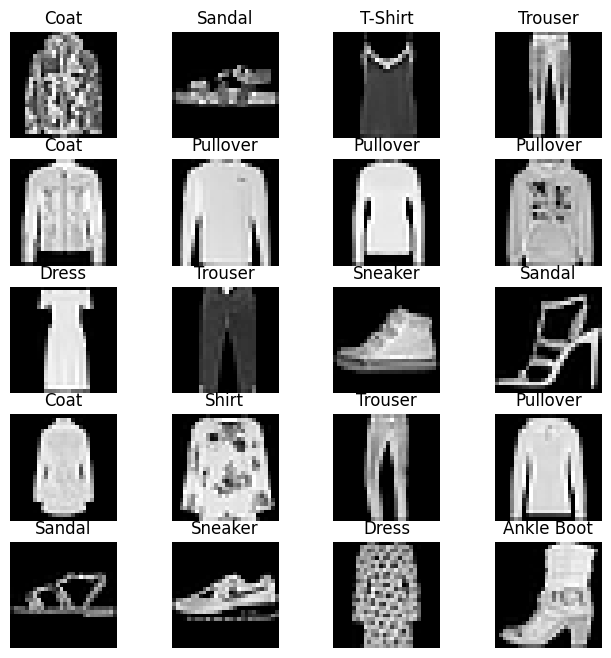

In [ ]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat',
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}  #열개의 클래스

fig = plt.figure(figsize=(8,8));  #출력할 이미지의 가로세로 길이로 단위는 inch
columns = 4;
rows =5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img,cmap='gray')
plt.show()  #20개의 이미지 데이터를 시각적으로 표현

### random.rand와 random.randn 예시

In [ ]:
import numpy as np
np.random.randint(10)  #0~10의 임의의 숫자를 출력

np.random.randint(1,10)  #1~9의 임의의 숫자를 출력

np.random.rand(8)  #0~1사이의 정규표준분포 난수를 행렬로 (1*8) 출력

np.random.rand(4,2)  #0~1 사이의 정규표준분포 난수를 행렬로 (4*2)출력

np.random.randn(8)  #평균이 0이고, 표준편차 1인 가우시안 정규분포 난수를 행렬로 (1*8) 출력

np.random.randn(4,2)  #평균이 0이고, 표준편차가 1인 가우시안 정규분포 난수를 행렬로 (4*2) 출력


array([[-0.51774985,  0.82058185],
       [ 0.05491543,  0.55123626],
       [-0.82003888,  0.16543776],
       [ 0.18517421, -1.1274256 ]])

### train_dataset을 이용한 3차원 배열을 생성

In [ ]:
import numpy as np
examp = np.arange(0, 100, 3)  #1~99의 숫자에서 3씩 건너뛴 행렬을 생성
examp.resize(6,4)  #행렬의 크기를 6*4로 조정
examp
examp[3]  #3행에 해당하는 모든 요소(값)들을 출력(행과 열은 0부터 시작)
examp[3,3]  #3행의 3번째 열에 대한 값(요소)을 출력
examp[3][3]  #3행의 3번째 열에 대한 값(요소)을 출력하기 때문에 바로 앞의 결과와 동일

45

### train_datast[img_xy][0][0,:,:] 의미

In [ ]:
examp = np.arange(0, 500, 3)
examp.resize(3,5,5)
examp
examp[2][0][3]

159

### 심층 신경망 모델 생성

In [ ]:
class FashionDNN(nn.Module):
  def __init__(self):
      super(FashionDNN,self).__init()
      self.fc1 = nn.Linear(in_features=784,out_features=256)
      self.drop = nn.Dropout(0,25)
      self.fc2 = nn.Linear(in_features=256,out_features=128)
      self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):
      out = input_data.view(-1,784)
      out = F.relu(self.fc1(out))
      out = self.drop(out)
      out = F.relu(self.fc2(out))
      out = self.fc3(out)
      return out

### 클래스와 함수의 차이

In [ ]:
# 함수에 대한 예시
def add(num1, num2):  #함수 정의(num1,num2를 받아서 더해 주는 함수)
    result = num1 + num2
    return result

print(add(1,2))
print(add(2,3))

3
5


In [ ]:
# 클래스에 대한 코드
class Calc:
  def __init__(self):  #객체를 생성할 때 호출하면 실행되는 초기화 함수
      self.result = 0

  def add(self, num1, num2):
      self.result = num1 + num2
      return self.result

obj1 = Calc()
obj2 = Calc()

print(obj1.add(1,2))
print(obj1.add(2,3))
print('---------------------')
print(obj2.add(2,2))
print(obj2.add(2,3))

3
5
---------------------
4
5


### nn을 사용하는 코드

In [ ]:
import torch
import torch.nn as nn

inputs = torch.randn(64, 3, 244, 244)
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding =1)  #세개의 채널이 입력되어 64개의 채널이 출력되기 위한 연산으로 3*3 크기의 커널을 사용
outputs = conv(inputs)
layer = nn.Conv2d(1, 1, 3)

### nn.functional을 사용하는 예시 코드

In [ ]:
import torch.nn.functional as F

imputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding =1)

### 심층 신경망에서 필요한 파라미터 정의

In [ ]:
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss();  #분류 문제에서 사용하는 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

AttributeError: 'super' object has no attribute '_FashionDNN__init'

### 심층 신경망을 이용한 모델 학습

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)

        outputs = model(train)  #학습 데이터를 모델에 적용
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predicitons = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
              print("Iteraration: {}, Loss : {}, Accuracy : {}%".format(count, loss.data,
                                                                        accuracy))

NameError: name 'model' is not defined

### 합성곱 네트워크 생성

In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MazPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kerbel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600,out_features=120)
        self.fc3 = nn.Linear(in_features=120,out_features=10)  #마지막 계층의 out_features는 클래스 개수를 의미

    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = out.view(out.size(0),-1)
      out = self.fc1(out)
      out = self.drop(out)
      out = self.fc2(out)
      out = self.fc3(out)
      return out

### 합성곱 네트워크를 위한 파라미터 정의

In [ ]:
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate);
print(model)

AttributeError: module 'torch.nn' has no attribute 'MazPool2d'

### 모델 학습 및 성능 평가

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

prediction_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct*100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
              print("Iteration : {}, Loss: {}, Accuracy: {}%".format(count, loss.data,
                                                                     accuracy))

NameError: name 'model' is not defined